In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy
import os 

In [78]:
df_list = []
for file in os.listdir("../data"): 
    df = pd.read_csv("../data/" + file, sep = ",")
    df.columns = ["number_particles", "cluster_radius"]
    df.number_particles = df.number_particles.apply(lambda x : int(x.strip("number_particles:")))
    df.cluster_radius = df.cluster_radius.apply(lambda x : float(x.strip("cluster_radius:")))
    df = df.drop(columns = "number_particles")
    df_list.append(df)

In [79]:
df = pd.concat(df_list, axis = 1)

In [80]:
df

,cluster_radius,cluster_radius,cluster_radius,cluster_radius,cluster_radius,cluster_radius,cluster_radius,cluster_radius,cluster_radius,cluster_radius,...,cluster_radius,cluster_radius,cluster_radius,cluster_radius,cluster_radius,cluster_radius,cluster_radius,cluster_radius,cluster_radius,cluster_radius
0,1.414214,1.000000,1.000000,1.414214,1.0,1.000000,2.000000,1.414214,2.000000,1.000000,...,2.00000,1.414214,1.000000,1.414214,1.414214,1.000000,2.000000,1.414214,1.414214,1.000000
1,1.414214,1.414214,1.000000,2.000000,2.0,2.000000,2.236068,1.414214,3.000000,1.414214,...,2.00000,2.236068,1.000000,1.414214,1.414214,1.414214,2.000000,1.414214,1.414214,1.000000
2,1.414214,2.236068,2.000000,3.000000,3.0,2.000000,3.000000,2.236068,4.000000,1.414214,...,2.00000,3.162278,2.000000,1.414214,2.000000,2.000000,2.236068,2.236068,1.414214,2.000000
3,2.000000,2.236068,2.000000,3.000000,3.0,2.000000,4.000000,2.236068,4.000000,1.414214,...,2.00000,3.162278,2.000000,2.236068,2.236068,2.236068,3.162278,2.236068,1.414214,2.236068
4,2.236068,2.236068,2.000000,3.162278,3.0,2.236068,4.000000,3.162278,4.000000,2.000000,...,2.00000,3.162278,3.000000,2.236068,2.828427,3.162278,3.162278,2.236068,1.414214,2.828427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,132.378246,129.003876,150.163245,131.244047,119.0,143.401534,150.000000,138.322088,131.461021,148.276768,...,134.26094,139.086304,153.287312,138.708327,147.410990,154.635054,127.251719,149.465715,136.623570,117.085439
4994,132.378246,129.003876,150.163245,131.244047,119.0,143.401534,150.000000,138.322088,131.461021,148.276768,...,134.26094,139.086304,153.287312,138.708327,147.410990,154.635054,127.251719,149.465715,136.623570,117.085439
4995,132.378246,129.003876,150.163245,131.244047,119.0,143.401534,150.000000,138.322088,131.461021,148.276768,...,134.26094,139.086304,153.287312,138.708327,147.410990,154.635054,127.251719,149.465715,136.623570,117.085439
4996,132.378246,129.003876,150.163245,131.244047,119.0,143.401534,150.000000,138.322088,131.461021,148.276768,...,134.26094,139.086304,153.287312,138.708327,147.410990,154.635054,127.251719,149.465715,136.623570,117.085439


In [53]:
df['cluster_radius_avg'] = df.mean(axis=1)
df['cluster_radius_std'] = df.std(axis=1)
df = df.drop(columns = "cluster_radius")

KeyError: "['cluster_radius'] not found in axis"

In [58]:
df['num_particles'] = [x for x in range(len(df))]

In [71]:
data_mask = np.logical_and(np.isfinite(np.log(df.num_particles)),  np.isfinite(np.log(df.cluster_radius_avg)))

/home/cm2435/anaconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [73]:
log_num_particle = np.log(df.num_particles)[data_mask]
log_cluster_rad = np.log(df.cluster_radius_avg)[data_mask]

/home/cm2435/anaconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [77]:
]

,cluster_radius_avg,cluster_radius_std,num_particles
0,0.872052,0.346068,0
1,1.076525,0.425930,1
2,1.419982,0.563837,2
3,1.555319,0.623152,3
4,1.704815,0.717074,4
...,...,...,...
4993,74.599658,45.185125,4993
4994,74.599658,45.185125,4994
4995,74.599658,45.185125,4995
4996,74.599658,45.185125,4996


1.7681299074942445 0.9166238645400817


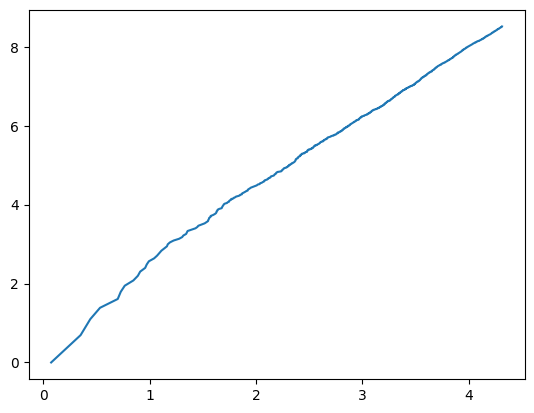

In [76]:
from scipy import stats

plt.errorbar(log_cluster_rad, log_num_particle)
slope, intercept, r_value, p_value, std_err = stats.linregress(log_cluster_rad, log_num_particle)
print(slope, intercept)
plt.show()